In [1]:
from simulation import monte_carlo_simulation
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import f_oneway

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Hypothesis 2. Higher seat occupancy leads to longer evacuation times due to congestion

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


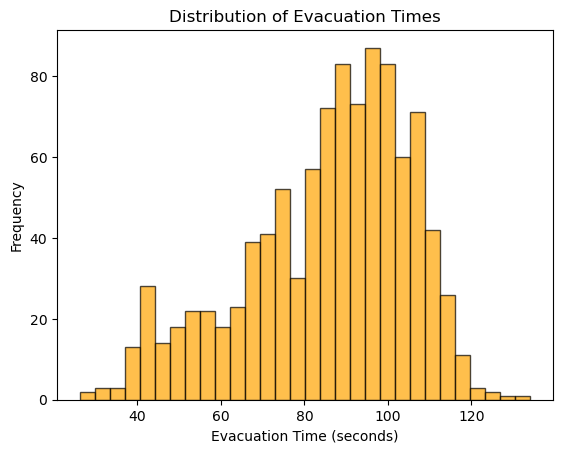

In [2]:
# A320 Configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000
proportion_old = 0.3

# Run simulations
evacuation_times = monte_carlo_simulation(
    rows=rows,
    seats_per_row=seats_per_row,
    seats_per_row_front=seats_per_row_front,
    front_rows=front_rows,
    exits=exits,
    speed_factor=speed_factor,
    num_simulations=num_simulations,
    proportion_old=proportion_old,
    emergency_level=emergency_level,
    occupancy_rate=occupancy_rate
)
# Analyze the results
average_time = np.mean(evacuation_times)
std_deviation = np.std(evacuation_times)

print(f"Average evacuation time: {average_time:.2f} seconds")
print(f"Standard deviation: {std_deviation:.2f} seconds")

# Plot the results
plt.hist(evacuation_times, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Evacuation Times')
plt.xlabel('Evacuation Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Define the different occupancy rates to test
# A320 Configuration
rows = 26
seats_per_row_front = 2
seats_per_row = 3
front_rows = 3
exits = [0, 9, 10, 25]

# Simulation parameters
speed_factor = 0.8
emergency_level = 0.5
occupancy_rate = 0.8
num_simulations = 1000
proportion_old = 0.3

occupancy_rates = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]  # 70%, 75%, 80%, 85%, 90%, 95%, 100% occupancy
average_times = []  # To store the average evacuation times for each proportion
std_deviations = []  # To store the standard deviations for each proportion

# Loop through different old passenger proportions
for occupancy_rate in occupancy_rates:
    # Run simulations
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    # Calculate the average evacuation time and standard deviation
    average_time = np.mean(evacuation_times)
    std_deviation = np.std(evacuation_times)

    average_times.append(average_time)
    std_deviations.append(std_deviation)

    print(f"Occupancy Rate {occupancy_rate*100}% - Average Evacuation Time: {average_time:.2f} seconds, Standard Deviation: {std_deviation:.2f} seconds")

# Visualize the evacuation times for different occupancy rates
plt.plot(occupancy_rates, average_times, marker='o', linestyle='-', color='b', label='Average Evacuation Time')
plt.fill_between(occupancy_rates, np.array(average_times) - np.array(std_deviations),
                 np.array(average_times) + np.array(std_deviations), color='orange', alpha=0.3, label='Std Deviation')
plt.title('Evacuation Time vs. Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Evacuation Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()

0.8


In [4]:
# Define the different occupancy rates to test
occupancy_rates = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]  # 70%, 75%, 80%, 85%, 90%, 95%, 100% occupancy
evacuation_times_by_rate = []  # To store evacuation times for each occupancy rate

# Loop through different occupancy rates and collect evacuation times
for occupancy_rate in occupancy_rates:

# Run simulations
    evacuation_times = monte_carlo_simulation(
        rows=rows,
        seats_per_row=seats_per_row,
        seats_per_row_front=seats_per_row_front,
        front_rows=front_rows,
        exits=exits,
        speed_factor=speed_factor,
        num_simulations=num_simulations,
        proportion_old=proportion_old,
        emergency_level=emergency_level,
        occupancy_rate=occupancy_rate
    )
    evacuation_times_by_rate.append(evacuation_times)

# Perform ANOVA to test if there is a significant difference in evacuation times
f_statistic, p_value = f_oneway(*evacuation_times_by_rate)

# Display the result of the ANOVA
print(f"ANOVA Test Result:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Determine if the difference is statistically significant
if p_value < 0.05: # Significance level
    print("Reject the null hypothesis: The difference in evacuation times is statistically significant")
else:
    print("Fail to reject the null hypothesis: The difference in evacuation times is not statistically significant")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.8
0.5
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instru

ValueError: max() iterable argument is empty